# Imports and Data Frame Creation

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns

In [0]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [0]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [0]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101707,71479,6,3,10,10,9,27,18,15,18,73,119,8,76,40,34,22,717,749,790,17,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,?,?,Caucasian,Female,[70-80),?,1,1,7,3,?,?,1,0,13,0,0,0,428,276,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,60,71,76099,54708,26068,98569,53947,60228,57464,17756,40256,49949,3206,46649,6086,85008,90353,67603,6862,6752,11555,49427,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [0]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [0]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

       encounter_id patient_nbr             race  ... change diabetesMed readmitted
317               ?       69921        Caucasian  ...     Ch         Yes         NO
691               ?     1723572  AfricanAmerican  ...     Ch         Yes        >30
922               ?    58871601            Other  ...     No          No         NO
1222              ?     4876038  AfricanAmerican  ...     Ch         Yes         NO
2921              ?      581499        Caucasian  ...     No          No         NO
3645              ?     2837826        Caucasian  ...     Ch         Yes         NO
8915              ?    19041462        Caucasian  ...     Ch         Yes         NO
15303             ?     5008419        Caucasian  ...     No          No         NO
16102             ?   111886398        Caucasian  ...     No          No        <30
16675             ?    20299680        Caucasian  ...     Ch         Yes         NO
17402             ?      825975  AfricanAmerican  ...     No          No    

In [0]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [0]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [0]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [0]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.058959
patient_nbr                  0.069768
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.079594
discharge_disposition_id     0.014740
admission_source_id          0.054046
time_in_hospital             0.006879
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.076646
num_procedures               0.006879
num_medications              0.026531
number_outpatient            0.026531
number_emergency             0.032427
number_inpatient             0.049132
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.093351
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [0]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [0]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [0]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,0.0,0.0,0.0,414,411,250,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,0.0,0.0,0.0,414,411,V45,7.0,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,0.0,0.0,0.0,428,492,250,8.0,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,0.0,0.0,0.0,398,427,38,8.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,0.0,0.0,0.0,434,198,486,8.0,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [0]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

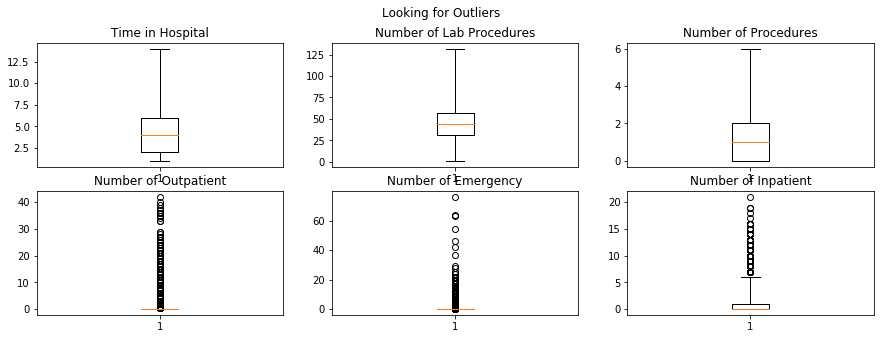

In [0]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [0]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

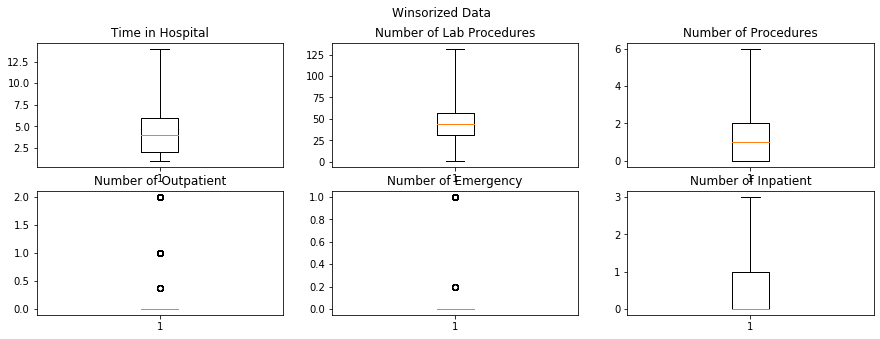

In [0]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [0]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [0]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101685 non-null float64
discharge_disposition_id    101751 non-null float64
admission_source_id         101711 non-null float64
num_medications             101739 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101671 non-null float64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride       

In [0]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [0]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [0]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [0]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [0]:
# add readmission to df3
df3['readmitted_binary'] = df3['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [0]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,1.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


#Look at relationships between your input variables. Many models assume that your input variables are independent of each other. How true is that for this data set?

Continuous - continuous: correlation matrix

Continuous - categorical: T-test, ANOVA, etc. i.e. statistical significance tests

Categorical - categorical: Chi-square test

In [0]:
# continuous - continuous
df3.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary
admission_type_id,1.000000,0.083528,0.106577,-0.012399,-0.143541,0.129961,0.079554,0.026515,-0.019184,-0.038437,-0.116981,-0.004957
discharge_disposition_id,0.083528,1.000000,0.018220,0.162861,0.023536,0.015895,0.108813,-0.008695,-0.024434,0.020805,0.046951,-0.014950
admission_source_id,0.106577,0.018220,1.000000,-0.007107,0.048650,-0.135431,-0.054423,0.027312,0.059817,0.036247,0.072029,0.039925
time_in_hospital,-0.012399,0.162861,-0.007107,1.000000,0.318410,0.191444,0.466071,-0.008976,-0.009699,0.073582,0.220011,0.051266
num_lab_procedures,-0.143541,0.023536,0.048650,0.318410,1.000000,0.058059,0.268077,-0.007676,-0.002359,0.039012,0.152752,0.039202
num_procedures,0.129961,0.015895,-0.135431,0.191444,0.058059,1.000000,0.385682,-0.024771,-0.038219,-0.066177,0.073530,-0.044746
num_medications,0.079554,0.108813,-0.054423,0.466071,0.268077,0.385682,1.000000,0.045183,0.013018,0.064136,0.261302,0.046676
number_outpatient,0.026515,-0.008695,0.027312,-0.008976,-0.007676,-0.024771,0.045183,1.000000,0.091414,0.107372,0.094114,0.082170
number_emergency,-0.019184,-0.024434,0.059817,-0.009699,-0.002359,-0.038219,0.013018,0.091414,1.000000,0.266584,0.055462,0.102973
number_inpatient,-0.038437,0.020805,0.036247,0.073582,0.039012,-0.066177,0.064136,0.107372,0.266584,1.000000,0.104660,0.217237


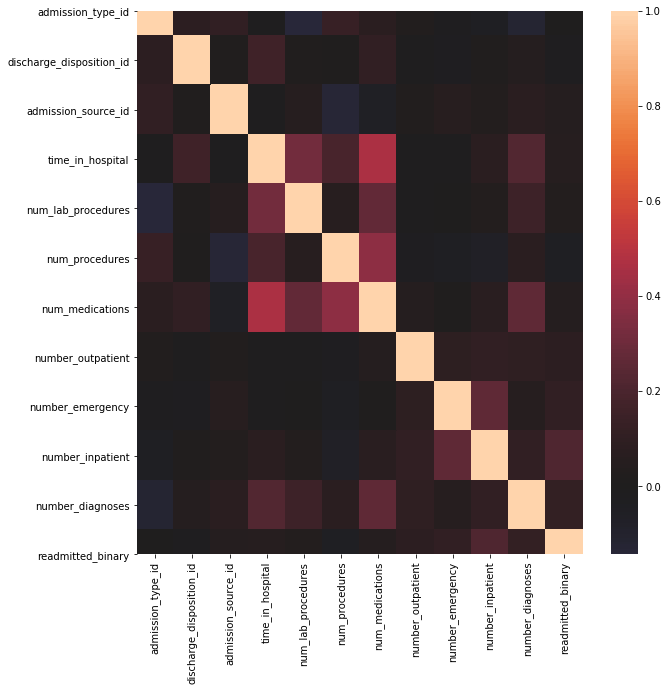

In [0]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(), center = 0)
plt.show()

In [0]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_max_glu_serum'] = df['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
df['ordinal_max_glu_serum'].value_counts()

0    96420
1     2597
2     1485
3     1264
Name: ordinal_max_glu_serum, dtype: int64

In [0]:
stats.shapiro(df['ordinal_max_glu_serum'].sample(5000))

(0.2118123173713684, 0.0)

In [0]:
# Categorical ordinal_ max_glu_serum, time_in_hospital
#stats.mannwhitneyu(df['ordinal_max_glu_serum'], df['time_in_hospital'])


In [0]:
df['diabetesMed'].value_counts()

In [0]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_diabetesMed'] = df['diabetesMed'].map({'Yes': 1, 'No': 0})
df['ordinal_diabetesMed'].dropna()

In [0]:
# Categorical ordinal_diabetesMed, time_in_hospital
stats.mannwhitneyu(df['ordinal_diabetesMed'], df['time_in_hospital'])

In [0]:
# Categorical - categorical: Chi-square test
# Categorical: (age, weight)
aw_ct = pd.crosstab(df['age'],df['weight'])
aw_ct

In [0]:
# Categorical - categorical: Chi-square test
(stats.chisquare(aw_ct, axis = None))

In [0]:
# Categorical - categorical: Chi-square test
# Categorical: race, weight)
rw_ct = pd.crosstab(df['race'],df['weight'])
rw_ct

In [0]:
# Categorical - categorical: Chi-square test
(stats.chisquare(rw_ct, axis = None))

In [0]:
# Categorical - categorical: Chi-square test
# Categorical: (gender, age)
ga_ct = pd.crosstab(df['gender'],df['age'])
ga_ct

In [0]:
# Categorical - categorical: Chi-square test
(stats.chisquare(ga_ct, axis = None))

**Continuous - continuous: correlation matrix**

num_lab_procedures is correlated to num_procedures

num_medications is correlated to time_in_hospital

num_medications is correlated to number_diagnoses

**Continuous - categorical:** box, boxen, t-test, ANOVa

ordinal_diabetesMed to num_medications

**Categorical - categorical** countplot, Crosstab, Chi-square

The following tested are independent:

age to weight

race to weight

gender to age 

#Make sure you demonstrate each of the statistical tests and each type of graph at least once. Experiment with different ways of achieving the same type of graph. There are many ways to get the same result, and it’s good to have many in your toolbox

Statistical tests performed above and charts below

In [0]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxenplot(df['ordinal_diabetesMed'], df['time_in_hospital'])

plt.subplot(1,2,2)
sns.boxenplot(df['ordinal_max_glu_serum'], df['time_in_hospital'])
plt.show()

In [0]:
# num_lab_procedures is correlated to num_procedures
# num_medications is correlated to time_in_hospital
# num_medications is correlated to number_diagnoses
sns.jointplot('num_lab_procedures', 'num_procedures', kind = 'reg', data = df)
plt.show()

In [0]:
# num_medications is correlated to time_in_hospital

sns.jointplot('num_medications', 'time_in_hospital', kind = 'reg', data = df)

plt.show()

In [0]:
# num_medications is correlated to number_diagnoses
sns.jointplot('num_medications', 'number_diagnoses', kind = 'reg', data = df)

plt.show()

## Adding Readmitted Binary into DF2

In [0]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Race and Readmission

In [0]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

In [0]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [0]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

In [0]:
stats.chisquare(count_table, axis = None)

In [0]:
type(count_table)

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

In [0]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [0]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

In [0]:
stats.chisquare(count_table1, axis = None)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

In [0]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [0]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

In [0]:
stats.chisquare(count_table2, axis = None)

#Determine relationships between your input variables and your outcome. Which features have the strongest relationship?

## Determine Relationship between Time in Hospital and Readmission

In [0]:
plt.hist(df2['time_in_hospital'])

In [0]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [0]:
age_list=df2['age'].unique()

In [0]:
sns.countplot(df2['age'])

In [0]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [0]:
df2.head()

In [0]:
sns.countplot(df2['age_rank'])

In [0]:
df_num = df2.select_dtypes(include='number').copy()

In [0]:
df_num.head()

In [0]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [0]:
df_num.head()

In [0]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

In [0]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler= StandardScaler()

In [0]:
df_num.drop('scale_num_med',axis=1);


In [0]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

In [0]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

In [0]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

In [0]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [0]:
# Continuous to categorical: t-test, ANOVA or boxen
# Categorical max_glu_serum , diabetesMed, time_in_hospital
df['ordinal_max_glu_serum'] = df['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3})
df['ordinal_max_glu_serum'].value_counts()

#Feature Selection

In [0]:
from sklearn.feature_selection import SelectKBest, f_classif


In [153]:
 df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary'],
      dtype='object')

In [0]:

df2 = df2.fillna(0)
Y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [157]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,Y)
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])
X_best_feature.columns


Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'],
      dtype='object')

In [158]:
X_best_feature.head()

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient
0,1.0,1.0,0.0,0.0,0.0
1,3.0,18.0,0.0,0.0,0.0
2,2.0,13.0,2.0,0.0,1.0
3,2.0,16.0,0.0,0.0,0.0
4,1.0,8.0,0.0,0.0,0.0


In [159]:
kbest.scores_

array([2.57103319e+00, 2.29629058e+01, 1.60788218e+02, 2.69107554e+02,
       1.53980706e+02, 2.04401290e+02, 2.21012777e+02, 6.91608285e+02,
       1.09070665e+03, 5.04111626e+03])

In [160]:
pd.Series(kbest.scores_, index=X.columns)

admission_type_id              2.571033
discharge_disposition_id      22.962906
admission_source_id          160.788218
time_in_hospital             269.107554
num_lab_procedures           153.980706
num_procedures               204.401290
num_medications              221.012777
number_outpatient            691.608285
number_emergency            1090.706649
number_inpatient            5041.116264
dtype: float64

**PCA**

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components =10)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

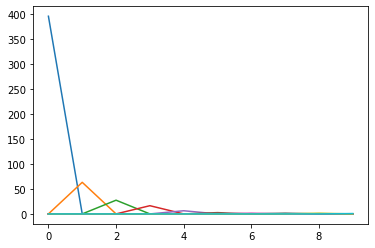

In [165]:
plt.plot(cov);